In [1]:
import pandas as pd

data = pd.read_json('customers.json')
##print(data.to_string())
print(data.head)
##print(data.tail)

<bound method NDFrame.head of      customer_id     customer_name      country           city
0           9780      Jessica Hart   Martinique  South William
1           9169         Amy Clark   Kazakhstan     Davisville
2           6631  Danielle Elliott      Armenia     East Danny
3           8772     Robin Mendoza       Uganda    Johnsonbury
4           8913    Abigail Miller      Namibia  Wrightchester
..           ...               ...          ...            ...
995         6357    Jessica Castro     Dominica     Deannastad
996          244    Cheryl Ramirez       Malawi  Martinezmouth
997         4490   Luis Strickland        Italy     Oneilltown
998         2984    Jennifer Kelly      Bahamas    Xavierville
999         8760    Anthony Wilson  Switzerland      Torreston

[1000 rows x 4 columns]>


In [3]:
print(data.size)

4000


In [4]:
print(data.shape)

(1000, 4)


In [5]:
data.describe()

,customer_id
count,1000.000000
mean,5053.297000
std,2792.627256
min,102.000000
25%,2662.000000
50%,5156.000000
75%,7395.000000
max,9991.000000


In [6]:
print(data.columns)

Index(['customer_id', 'customer_name', 'country', 'city'], dtype='object')


In [9]:
print(data.nunique())

customer_id      1000
customer_name     997
country           238
city              950
dtype: int64


In [10]:
print(data['country'].unique())
print(len(data['country'].unique()))

['Martinique' 'Kazakhstan' 'Armenia' 'Uganda' 'Namibia' 'Zimbabwe'
 'Belarus' 'Andorra' 'Mongolia' 'Austria' 'Indonesia' 'Greece'
 'Slovakia (Slovak Republic)' 'Bangladesh' 'Solomon Islands' 'Ethiopia'
 'Sierra Leone' 'Finland' 'Morocco' 'North Macedonia'
 'Saint Kitts and Nevis' 'Qatar' 'Kyrgyz Republic' 'Greenland' 'Hong Kong'
 'French Guiana' 'Seychelles' 'Saint Lucia' 'Fiji' 'Bahrain' 'Australia'
 'South Africa' 'Ukraine' 'Kiribati' 'Jamaica' 'Switzerland' 'Samoa'
 'Guernsey' 'Dominica' 'Iceland' 'Cocos (Keeling) Islands' "Cote d'Ivoire"
 'Saint Barthelemy' 'United Kingdom' 'Georgia' 'Slovenia' 'Azerbaijan'
 'Jordan' 'Gambia' 'Niger' 'Monaco' 'Mozambique'
 'Saint Pierre and Miquelon' 'Netherlands Antilles' 'Algeria' 'Korea'
 'Tanzania' 'Cayman Islands' 'Congo' 'Nigeria' 'Denmark' 'Guinea'
 'Cambodia' 'Honduras' 'Mali' 'Spain' 'Venezuela' 'Singapore' 'India'
 'Moldova' 'Equatorial Guinea' 'Thailand' 'Oman' 'Djibouti' 'Uruguay'
 'Antarctica (the territory South of 60 deg S)' 'Angola'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_json('transaction_logs.json')

data1.head

<bound method NDFrame.head of       order_id  customer_id  product_id           product_name  \
0            1         1731        8609  Central home & kitche   
1            2         5539        2409             Upon sport   
2            3         3507        1145       Across stationer   
3            4         4826        8375    Start home & kitche   
4            5         6538        2149             Draw beaut   
...        ...          ...         ...                    ...   
9995      9996         1496        9676    Range home & kitche   
9996      9997         7288        9927               Once toy   
9997      9998         8381        3852            Human beaut   
9998      9999         5494        7324            Light beaut   
9999     10000         1490        6547        Source furnitur   

     product_category      payment_type  qty  price            datetime  \
0      Home & Kitchen            Wallet   25  64216 2021-07-26 20:16:14   
1              Sports      

In [12]:
# Distribution of product categories
product_category_counts = data1['product_category'].value_counts()
print(product_category_counts)

product_category
Beauty            1049
Clothing          1043
Electronics       1033
Stationery        1000
Books              996
Groceries          994
Sports             993
Home & Kitchen     985
Toys               961
Furniture          946
Name: count, dtype: int64


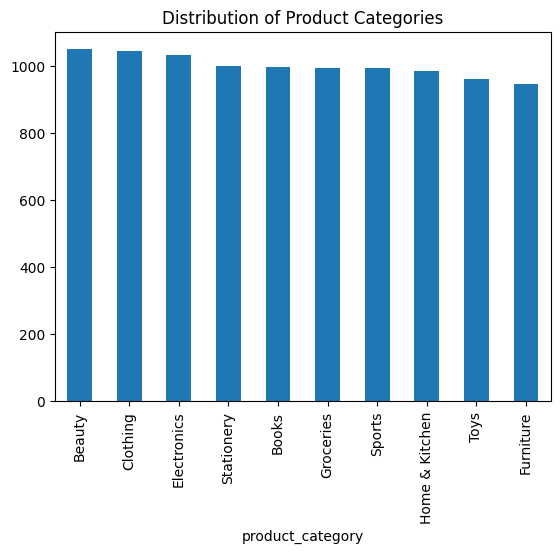

In [13]:
# Plot the distribution
product_category_counts.plot(kind='bar', title='Distribution of Product Categories')
plt.show()

In [14]:
# Success rates by payment type
success_rates = data1.groupby('payment_type')['payment_txn_success'].value_counts(normalize=True).unstack()
print(success_rates)

payment_txn_success         N         Y
payment_type                           
Card                 0.508327  0.491673
Internet Banking     0.487737  0.512263
UPI                  0.500814  0.499186
Wallet               0.498396  0.501604


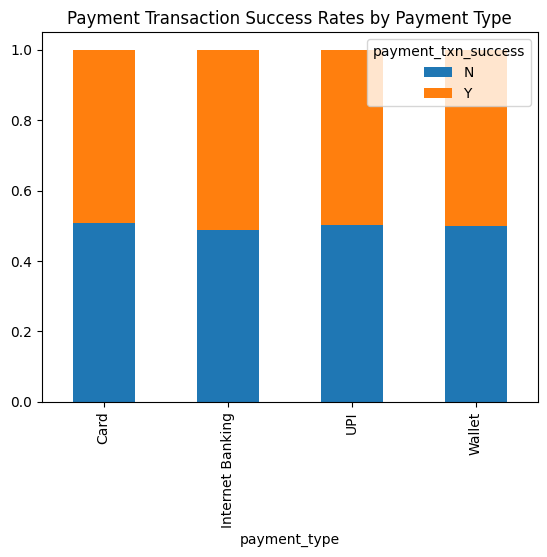

In [15]:
# Plot success rates
success_rates.plot(kind='bar', stacked=True, title='Payment Transaction Success Rates by Payment Type')
plt.show()

In [16]:
# Distribution of failure reasons
failure_reason = data1['failure_reason'].value_counts()
print(failure_reason)

failure_reason
                       5012
Card Expired           1016
Transaction Timeout    1008
Blocked Card            993
Invalid CVV             988
Insufficient Funds      983
Name: count, dtype: int64


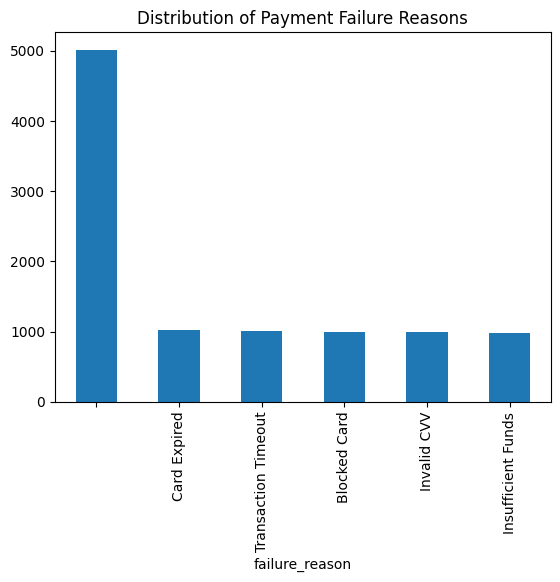

In [17]:
# Plot failure reasons
failure_reason.plot(kind='bar', title='Distribution of Payment Failure Reasons')
plt.show()

In [18]:
# Convert datetime column to pandas datetime
data1['datetime'] = pd.to_datetime(data1['datetime'])

# Extract date and time information
data1['date'] = data1['datetime'].dt.date
data1['hour'] = data1['datetime'].dt.hour

# Orders per date
orders_per_date = data1['date'].value_counts().sort_index()
print(orders_per_date)

date
2021-07-24    11
2021-07-25     8
2021-07-26     9
2021-07-27     8
2021-07-28    14
              ..
2024-07-19    18
2024-07-20     8
2024-07-21    10
2024-07-22    13
2024-07-23     3
Name: count, Length: 1096, dtype: int64


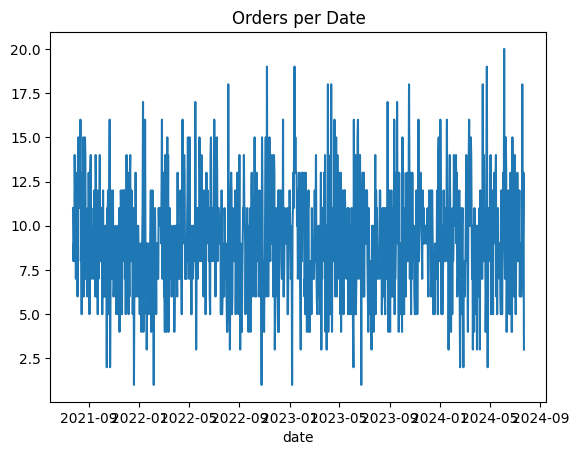

In [19]:
# Plot orders per date
orders_per_date.plot(kind='line', title='Orders per Date')
plt.show()